Faça o upload de um arquivo .zip com os seus dados e use o comando abaixo após a finalização do upload para a extração do conteúdo do arquivo no colab.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('todososdados.csv')
data.describe()

,steer,acceleration,breaking,speed
count,22277.000000,22277.000000,22277.0,22277.000000
mean,-0.034986,0.997656,0.0,30.142515
std,0.073005,0.045735,0.0,1.032279
min,-0.314554,0.000000,0.0,0.000002
25%,-0.061033,1.000000,0.0,30.190000
50%,-0.028169,1.000000,0.0,30.190250
75%,-0.009390,1.000000,0.0,30.190300
max,0.352113,1.000000,0.0,30.637620


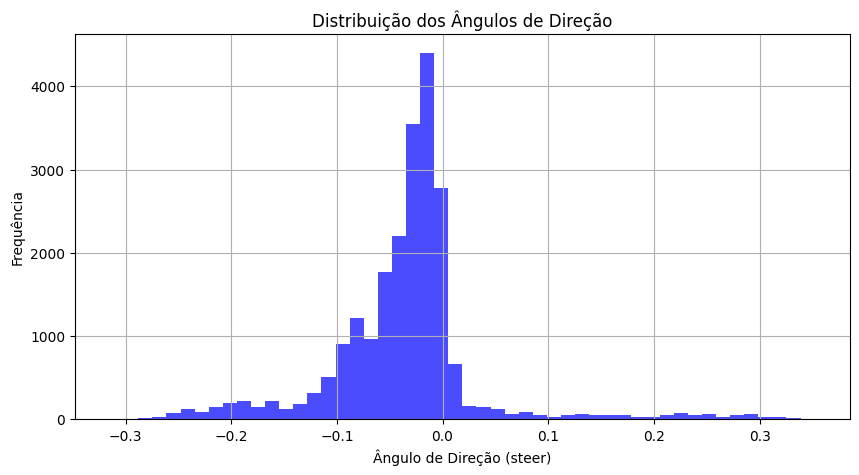

In [2]:
#preparação dos dados
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('todososdados.csv')

plt.figure(figsize=(10, 5))
plt.hist(data['steer'], bins=50, color='blue', alpha=0.7)
plt.title('Distribuição dos Ângulos de Direção')
plt.xlabel('Ângulo de Direção (steer)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Implemente as funções a seguir.

In [1]:
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import os
import pandas as pd
from torchvision.io import read_image
from torchvision import transforms
import numpy as np
import random
import matplotlib.pyplot as plt



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\moura\anaconda3\envs\visao\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\moura\anaconda3\envs\visao\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\moura\anaconda3\envs\visao\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Us

In [2]:

def add_random_shadow(image):
    # Adiciona sombra aleatória como uma fatia vertical da imagem
    h, w = image.shape[1], image.shape[2]
    x1, x2 = np.random.choice(w, 2, replace=False)
    k = h / (x2 - x1)
    b = - k * x1
    shadow_intensity = 0.5
    for i in range(h):
        c = int((i - b) / k)
        if c > 0 and c < w:
            image[:, i, :c] *= shadow_intensity
    return image

class CarSimDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, augment=True):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.augment = augment
        self.cameras = ['left', 'center', 'right']
        self.cameras_steering_correction = [.25, 0., -.25]

    def __getitem__(self, idx):
        camera_idx = np.random.randint(len(self.cameras)) if self.augment else 1
        camera = self.cameras[camera_idx]
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx][camera].strip())
        image = read_image(img_path).float() / 255.0  # Ler a imagem e normalizar os pixels
        angle = self.img_labels.iloc[idx]['steer'] + self.cameras_steering_correction[camera_idx]

        if self.augment:
            # Adiciona sombra aleatória
            image = add_random_shadow(image)
            # Deslocamento vertical aleatório
            v_delta = random.uniform(-0.05, 0.05)
            top_offset = 0.375 + v_delta
            bottom_offset = 0.125 + v_delta
            top = int(top_offset * image.shape[1])
            bottom = int(bottom_offset * image.shape[1])
            image = image[:, top:-bottom, :]
        
        if self.transform:
            image = self.transform(image)
        
        return image, angle

    def __len__(self):
        return len(self.img_labels)


Crie as variáveis a seguir a partir da classe implementada acima.

In [3]:
# Transformações específicas do PyTorch
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Redimensiona a imagem
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalização
])

# Configuração do Dataset de Treinamento
train_dataset = CarSimDataset(
    annotations_file='C:\\Users\\moura\\Searches\\behavior-cloning\\todososdados.csv',
    img_dir='DataAndLoader\\IMG',
    transform=transform,
    augment=True  # Ativa aumento de dados para treinamento
)

# Configuração do Dataset de Teste
test_dataset = CarSimDataset(
    annotations_file='C:\\Users\\moura\\Searches\\behavior-cloning\\todososdados.csv',
    img_dir='DataAndLoader\\IMG',
    transform=transform,
    augment=False  # Desativa aumento de dados para teste
)

In [4]:

# DataLoader para o Treinamento
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# DataLoader para o Teste
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Exemplo de como iterar sobre o DataLoader de Teste
for images, angles in test_dataloader:
    print(f"Shape of images: {images.shape}, Shape of angles: {angles.shape}")
    break  # Mostra apenas o primeiro lote

Shape of images: torch.Size([64, 3, 28, 28]), Shape of angles: torch.Size([64])


In [8]:
# Verificar o número total de imagens no dataset
num_images = len(train_dataset)
print(f"Total number of images in the train dataset: {num_images}")


Total number of images in the train dataset: 22277


# teste

In [9]:
import numpy as np
import pandas as pd
import os
from torchvision.io import read_image
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import random

def add_random_shadow(image):
    h, w = image.shape[1], image.shape[2]
    x1, x2 = np.random.choice(w, 2, replace=False)
    k = h / (x2 - x1)
    b = - k * x1
    shadow_intensity = 0.5
    for i in range(h):
        c = int((i - b) / k)
        if c > 0 and c < w:
            image[:, i, :c] *= shadow_intensity
    return image

def add_random_brightness(image):
    brightness_factor = np.random.uniform(0.5, 1.5)
    image = image * brightness_factor
    return image.clamp(0, 1) 

def random_rotate(image, angle):
    angle = np.random.uniform(-angle, angle)
    return transforms.functional.rotate(image, angle)

class CarSimDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, augment=True):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.augment = augment
        self.cameras = ['left', 'center', 'right']
        self.cameras_steering_correction = [.25, 0., -.25]

    def __getitem__(self, idx):
        if self.augment:
            probs = np.abs(self.img_labels['steer']) #+ 0.01  # Evitar divisão por zero
            probs /= probs.sum()  # Normalizar para formar uma distribuição de probabilidade
            idx = np.random.choice(self.img_labels.index, p=probs)
        
        camera_idx = np.random.randint(len(self.cameras))
        camera = self.cameras[camera_idx]
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx][camera].strip())
        image = read_image(img_path).float() / 255.0

        angle = self.img_labels.iloc[idx]['steer'] + self.cameras_steering_correction[camera_idx]

        if self.augment:
            image = add_random_shadow(image)
            image = add_random_brightness(image)
            image = random_rotate(image, 5)  # Rotação de até 5 graus

            # Outras transformações aqui, se necessário
        
        if self.transform:
            image = self.transform(image)
        
        return image, angle

    def __len__(self):
        return len(self.img_labels)

# Transformações específicas do PyTorch
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Ajustado para uma resolução maior
    
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Configuração do Dataset de Treinamento
train_dataset = CarSimDataset(
    annotations_file='C:\\Users\\moura\\Searches\\behavior-cloning\\todososdados.csv',
    img_dir='DataAndLoader\\IMG',
    transform=transform,
    augment=True
)

# Configuração do Dataset de Teste
test_dataset = CarSimDataset(
    annotations_file='C:\\Users\\moura\\Searches\\behavior-cloning\\todososdados.csv',
    img_dir='DataAndLoader\\IMG',
    transform=transform,
    augment=False
)


In [10]:
# DataLoader para o Treinamento
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# DataLoader para o Teste
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Exemplo de como iterar sobre o DataLoader de Teste
for images, angles in test_dataloader:
    print(f"Shape of images: {images.shape}, Shape of angles: {angles.shape}")
    break  # Mostra apenas o primeiro lote

Shape of images: torch.Size([64, 3, 28, 28]), Shape of angles: torch.Size([64])


In [11]:
# Verificar o número total de imagens no dataset
num_images = len(train_dataset)
print(f"Total number of images in the train dataset: {num_images}")

Total number of images in the train dataset: 22277


O código abaixo será utilizado para treinar o modelo com o seu dataset.

In [51]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 28, 28])
Shape of y: torch.Size([64]) torch.float32


In [52]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits.squeeze()

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [53]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [54]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [55]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    # correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [56]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.084525  [   64/22277]
loss: 0.036148  [ 6464/22277]
loss: 0.062836  [12864/22277]
loss: 0.056677  [19264/22277]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.042572 

Epoch 2
-------------------------------
loss: 0.049517  [   64/22277]
loss: 0.057229  [ 6464/22277]
loss: 0.046532  [12864/22277]
loss: 0.032012  [19264/22277]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.037673 

Epoch 3
-------------------------------
loss: 0.040782  [   64/22277]
loss: 0.033145  [ 6464/22277]
loss: 0.040849  [12864/22277]
loss: 0.031492  [19264/22277]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.034234 

Epoch 4
-------------------------------
loss: 0.025317  [   64/22277]
loss: 0.031435  [ 6464/22277]
loss: 0.025879  [12864/22277]
loss: 0.033688  [19264/22277]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.033961 

Epoch 5
-------------------------------
loss: 0.027174  [   64/22277]
loss: 0.019076  [ 6464/22277]
loss: 0.028621  [12864/22277]
loss: 0.023256  [19264/222

In [57]:
torch.save(model.state_dict(), "model_preprocess3.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Faça o download do seu modelo após o treinamento, caso queira testá-lo no simulador.

O código a seguir demonstra como o modelo será usado para inferência no simulador. Caso seja necessário, altere a função *preprocess*.

In [28]:
def preprocess(x):
    # TODO: se necessário, alterar função
    return x

In [29]:
# model = NeuralNetwork().to(device)
# model.load_state_dict(torch.load("model.pth"))

In [30]:
# model.eval()
# x = test_data[0][0]
# with torch.no_grad():
    # x = preprocess(x)
    # x = x.to(device)
    # pred = model(x)